Link to Data Source : https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

Câu 1: Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:\
• Biến (đặc trưng): do SV chọn từ dataset.\
• Thông số thống kê: giá trị trung bình (GTTB).\
• Viết hàm có:\
    • Input parameters: n (sample size), M (number of bootstrap samplings), x (confidence interval in %).\
    • Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của GTTB của đặc trưng đã chọn.

In [2]:
#Các thư viện cần thiết
import numpy as np
import pandas as pd

#Các thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the data frame
df = pd.read_csv('../bootstrap-sampling-method/Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

Hàm sử dụng phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy:\
Đầu vào: N, M, x.\
Trong đó: \
    + N: số quan sát có trong 1 mẫu (kích thước của 1 mẫu).\
    + M: số lượng mẫu Bootstap.\
    + x: khoảng tin cậy (%).

In [2]:
def bootstrapping(N, M, x):
    #Khởi tạo các biến
    upper_bound = 0
    lower_bound = 0
    mean_bootstrap = []

    for _ in range(M):
        #Tạo mẫu với kích thước là N, các giá trị có thể lặp
        new_df = df.sample(n= N, replace=True)

        #Lưu giá trị Mean tìm được của mẫu đó
        mean_bootstrap.append(float(new_df.mean(axis=0)))


    dict = {'Mean Bootstrap': mean_bootstrap}
    mean_bootstrap = pd.DataFrame(dict)

    #Cú pháp hàm SMALL trong excel
    # =SMALL(array, k)
    # Trong đó:
    # array: Là phạm vi vùng dữ liệu dạng số chứa giá trị bạn cần xác định giá trị nhỏ thứ k.
    # k: Là thứ hạng của giá trị (tính từ giá trị nhỏ nhất) trong vùng dữ liệu cần trả về.

    #Sắp xếp lại các giá trị trong mean_bootstrap theo thứ tự tăng dần
    sorted_df = mean_bootstrap.sort_values(by='Mean Bootstrap', ascending=True)
    #đọc lại lý thuyết cách tính dải tin cậy này trong file excel ...
    lower_bound = sorted_df.iloc[round(M*x)]
    upper_bound = sorted_df.iloc[round(M*(1-x))]

    return mean_bootstrap, lower_bound, upper_bound


Xuất đồ thị Histogram - phân bố lấy mẫu với dải tin cậy của GTTB của đặc trưng

Cận dưới: 27.6
Cận trên: 57.1


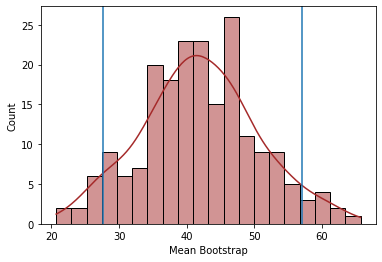

In [13]:
#Gọi hàm bootstrapping
mean_bootstrap, lower_bound, upper_bound = bootstrapping(10,201,0.05) # n, M, x%

# histogram
#Giải thích các tham số trong hàm histplot ... 
sns.histplot(mean_bootstrap['Mean Bootstrap'], kde=True ,color = 'brown', bins=20)

# khoảng tin cậy
print('Cận dưới: ' + str(float(lower_bound)))
print('Cận trên: '  + str(float(upper_bound)))
plt.axvline(float(lower_bound), 0,20)
plt.axvline(float(upper_bound), 0,20)
plt.show()

